# Project: Investigating a Dataset- IMDB Dataset

This is a section 1 final project by Eugene Masinde, a prospective Data Analyst working for Kaimosi Friends University in Vihiga county. You can reach me through any of the following:

<ul>
<li>Linkedin: https://www.linkedin.com/in/eugene-masinde-095bb343/</li>
<li>Email: odanga.masinde@gmail.com</li>
<li>Phone: +254727172822</li>
<li>Github: https://github.com/boygj</li>
</ul>


## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It will undergo various wrangling, exploration and conclusions.

I consider 'the questions' to be the most important part of this entire data analysis process. In my opinion, asking the correct questions from the data made available to me is key as it will determine the kinds of inferences that I will be able to make. As such, the overarching questions that I have developed from the IMDB dataset is:

Question 1: What are the average ratings of movies by their respective genres?
Question 2: How much revenue is generated relative to movie rating categories high, moderate and low? Does a higher movie budget determine how highly rated a movie becomes?
Question 3: Which movie genre generates the highest and lowest revenue?
Question 4: Does a higher movie budget mean that a movie will be rated highly overall?
Question 5: Which year were more movies released?


With this analysis I will build useful visuals to help my audience to understand the data and create meaningful insight from it

In [1]:
#import all relevant packages here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
#import and Print the head to see how data is output in from the dataset. The dataset in use is the IMDB Movies dataset
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Get all of the basic information from the dataser including column names, number of columns and rows and datatypes.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
#Get the number of rows and columns in the dataset
df.shape

(10866, 21)

In [8]:
#Get summary statistics from the dataset using the describe function
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above data, we can see some features of our dataset. For example, we can tell that the earliest movie was released in 1960 and the latest movie 2015. We can also see that the highest vote is 9.2, the average vote is 6.0 and the least vote is 1.5. More conclusions can be drawn from the data as well through out all of the columns.

<a id='wrangling'></a>
# Data Wrangling

From my line of questioning, it would be useful to focus primarily on the most important columns of use to me and do some data cleaning which will include dropping unnecessary data from the table, removing any duplicates in this data, finding and removing/ replacing missing data in the dataset and more

In [9]:
#Check for duplicate values

print(df.duplicated().sum())

1


In [10]:
#Drop duplicated values
df.drop_duplicates(inplace=True)

In [11]:
#Check if there are any duplicates left. 
print(df.duplicated().sum())

0


In [12]:
#Drop Unnecessary columns to allow us to focus on the most important ones. These columns were dropped because of the kind of questioning that I have done for this project.
df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview','budget_adj','release_date','vote_count', 'revenue_adj', 'imdb_id', 'director', 'production_companies','vote_count',  ], axis=1, inplace=True )

In [16]:
#Check if the columns have been dropped
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,7.3,2015


In [17]:
#check the shape to see rows and columns
df.shape

(10865, 9)

In [18]:
#Check for missing or null values

df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

In [19]:
#Drop sections with missing values

df.dropna(inplace=True)

In [20]:
#Check if the null values have been dropped
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

In [21]:
#Check the datatypes to see if any require changing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10842 non-null  int64  
 1   popularity      10842 non-null  float64
 2   budget          10842 non-null  int64  
 3   revenue         10842 non-null  int64  
 4   original_title  10842 non-null  object 
 5   runtime         10842 non-null  int64  
 6   genres          10842 non-null  object 
 7   vote_average    10842 non-null  float64
 8   release_year    10842 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 847.0+ KB


In [22]:
#Noticed that in the dataset, one movie can belong to many genres seprated with an | symbol. Select all genres with an |

df1=df[df['genres'].str.contains('|')]
df1

,id,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,7.3,2015
...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,95,Documentary,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,5.4,1966


In [24]:
#Use the copied dataframe df1 to extract the |

split_columns = ['genres']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])
df1

,id,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action,7.3,2015
...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,95,Documentary,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,176,Action,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,5.4,1966


In [25]:
#Save the cleaned data in a csv file
df1.to_csv('tmdb_v1.csv', index=False)

<a id='eda'></a>
# Exploratory Data Analysis

Now that the data has been cleaned and saved in a seperate file, we have to import the cleaned data 

In [26]:
#import the new csv file

df_s=pd.read_csv('tmdb_v1.csv')
df_s.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action,7.3,2015


In [ ]:
#View the shape
df_s.shape

Text(0.5, 0, 'Ratings')

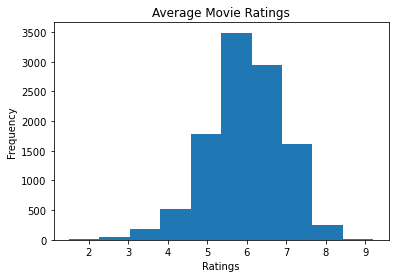

In [27]:
#Lets plot the average movie ratings

df_s['vote_average'].plot(kind='hist')
plt.title('Average Movie Ratings')
plt.xlabel('Ratings')

From the histogram above, can see that on average movies are rated at around 6.0. It is also easy to see that there are very few movies that are rated between 8.0 and 9.0.

### Question 1: What are the average ratings of movies by their respective genres?

In [28]:
#To answer this question, first we use the groupby function to list the average movie ratings per genre and sort in descending order

gen_ratings=df_s.groupby('genres')['vote_average'].mean().sort_values(ascending=False)
gen_ratings

genres
Documentary        6.923380
Music              6.605000
Animation          6.414888
History            6.381818
Crime              6.217632
Drama              6.200448
War                6.183051
Romance            6.133871
Western            6.080952
Adventure          6.052048
Science Fiction    5.963551
Family             5.945833
Mystery            5.900800
Foreign            5.900000
Comedy             5.882924
Fantasy            5.795956
TV Movie           5.793590
Action             5.752327
Thriller           5.634420
Horror             5.318798
Name: vote_average, dtype: float64

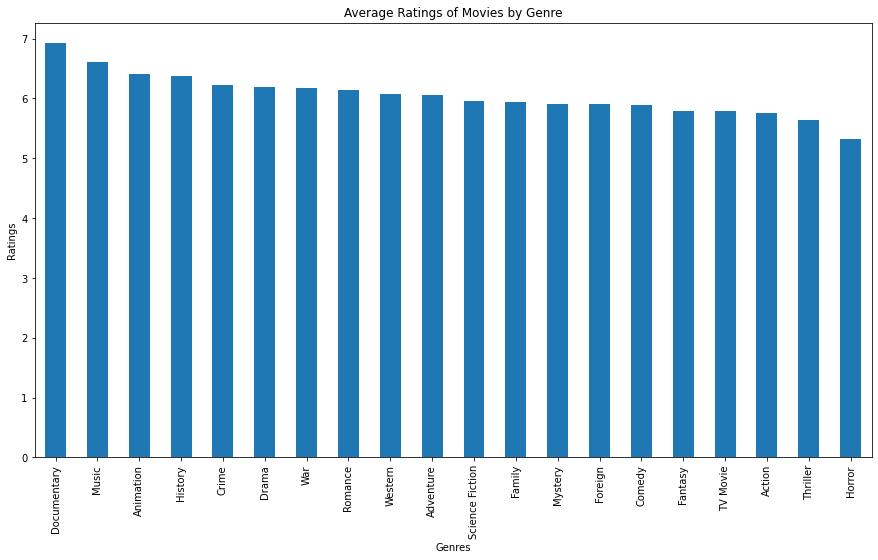

In [48]:
#Then we plot our findings 
plt.figure(figsize=(15,8))
gen_ratings.plot(kind='bar')

plt.title('Average Ratings of Movies by Genre')
plt.xlabel('Genres')
plt.ylabel('Ratings')
plt.show()

### Question 2: How much revenue is generated relative to movie rating categories high, moderate and low?

In [30]:
#First lets get more information on our vote_average column

df_s['vote_average'].describe()

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [31]:
#Lets classify movies according to their rating categories

def mratings(vote_average):
    if vote_average >= 6.6:
        return "High"
    elif vote_average < 5.4:
        return "Low"
    else:
        return "Moderate"

In [32]:
#Lets create a column for these ratings and call it rating_level and display the first 5 values

df_s['rating_level']=df_s['vote_average'].apply(mratings)
df_s.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_average,release_year,rating_level
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,6.5,2015,Moderate
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,7.1,2015,High
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure,6.3,2015,Moderate
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,7.5,2015,High
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action,7.3,2015,High


In [33]:
#Now lets use the groupby function to display the average revenue per rating category(level)

ratings=df_s.groupby('rating_level')['revenue'].mean()
ratings

rating_level
High        6.334239e+07
Low         1.208841e+07
Moderate    4.011156e+07
Name: revenue, dtype: float64

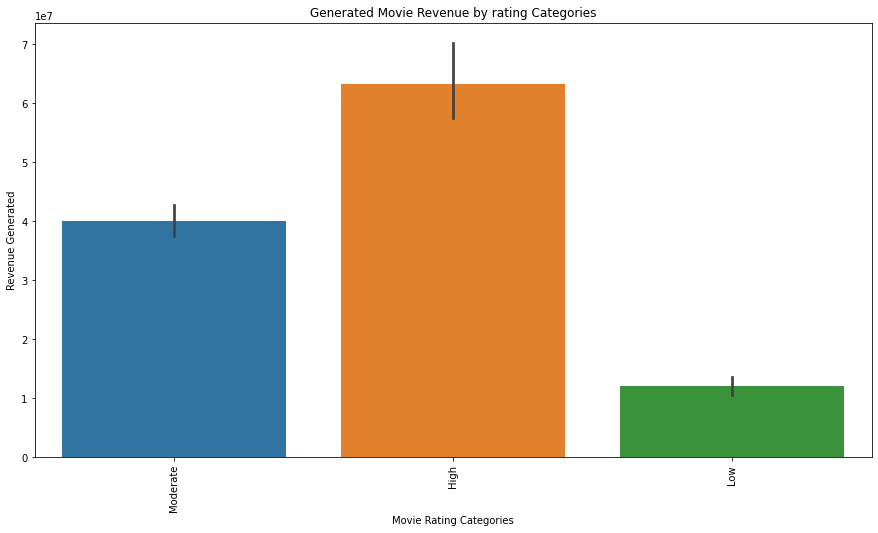

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='rating_level', y='revenue', data=df_s)
plt.xticks(rotation=90)
plt.title('Generated Movie Revenue by rating Categories')
plt.xlabel('Movie Rating Categories')
plt.ylabel('Revenue Generated')
plt.show()

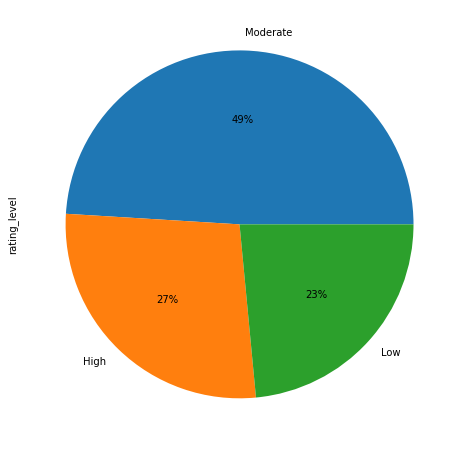

In [114]:
#Here is a piechart showing the same data from above
df_s.rating_level.value_counts().plot(kind='pie', figsize= (8,8), autopct='%1.0f%%');

### Question 3: Which movie genre generates the highest and lowest revenue?

In [35]:
#first lets see the columns in the dataframe

df_s.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'vote_average', 'release_year', 'rating_level'],
      dtype='object')

In [36]:
#Lets use the groupby function to determine the revenues of all of the genres and print the first 5

df_s.groupby('genres')['revenue'].mean().sort_values(ascending=False).head()

genres
Adventure          1.247560e+08
Science Fiction    7.965608e+07
Animation          7.145670e+07
Fantasy            6.729393e+07
Family             6.148926e+07
Name: revenue, dtype: float64

From this analysis we can see that advenuture movies generate the most revenue. Lets plot this

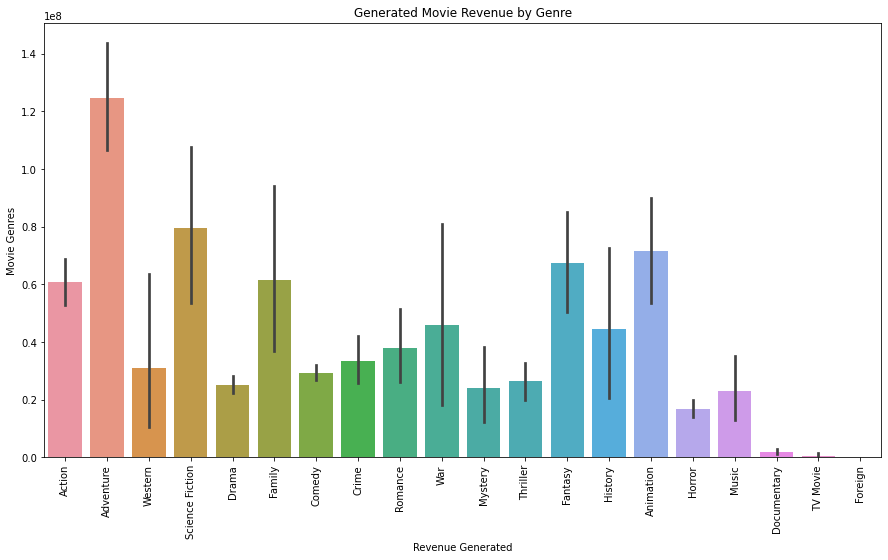

In [37]:
#Plot the findings above, I will use Seaborn for the beautiful visuals

plt.figure(figsize=(15,8))
sns.barplot(y='revenue', x='genres', data=df_s)
plt.xticks(rotation=90)
plt.title('Generated Movie Revenue by Genre')
plt.xlabel('Revenue Generated')
plt.ylabel('Movie Genres')
plt.show()

### Question 4: Does a higher movie budget mean that a movie will be rated highly overall?

In [46]:
#Lets use the groupby function to determine the budgets of all of the movies and print the first 5

df_s.groupby('rating_level')['budget'].mean().sort_values(ascending=False).head()

rating_level
Moderate    1.628364e+07
High        1.582377e+07
Low         9.890074e+06
Name: budget, dtype: float64

From this analysis it is easy to see that the movies rated under the category of moderately rated have higher budgets overall while those with low rating levels have the smallest budgets. Lets plot this

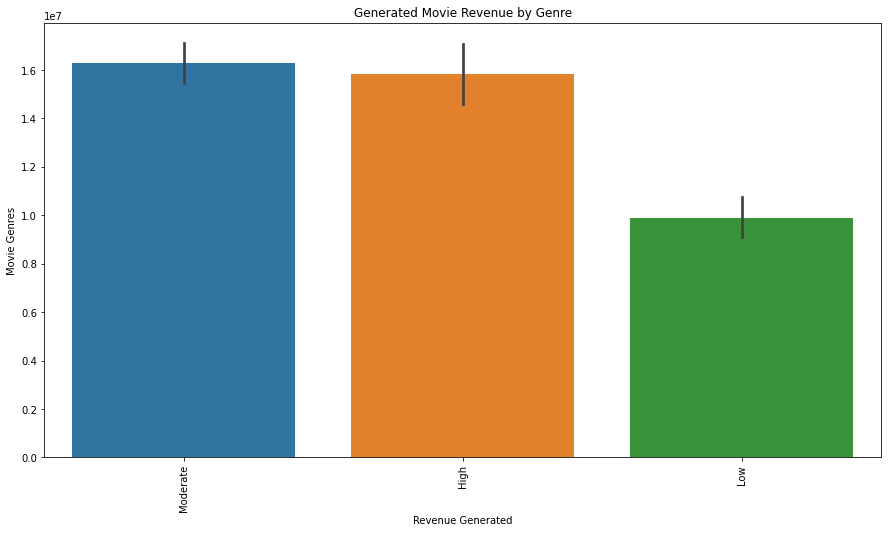

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(y='budget', x='rating_level', data=df_s)
plt.xticks(rotation=90)
plt.title('Generated Movie Revenue by Genre')
plt.xlabel('Revenue Generated')
plt.ylabel('Movie Genres')
plt.show()

### Question 5: Which year were more movies released?

In [80]:
#Lets find the value count of all movie release dates
counts=df_s.release_year.value_counts()
counts.head()

2014    699
2013    656
2015    627
2012    584
2011    540
Name: release_year, dtype: int64

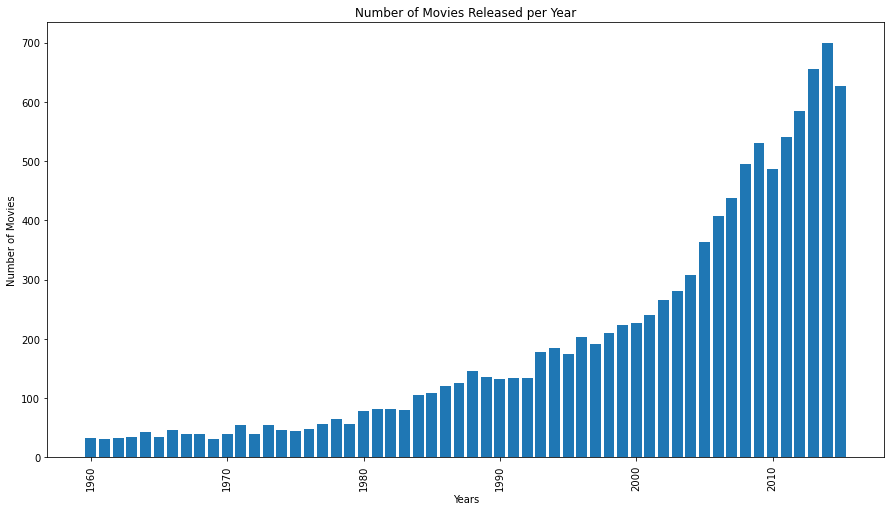

In [81]:
#Plotting allows us to be able to see things in perspective
plt.figure(figsize=(15,8))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.title('Number of Movies Released per Year')
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.show()

<a id='conclusions'></a>
# Conclusions

The following conclusions were made as a result of the exploratory data analysis process done above:

<ol>
    <li>Question 1: What are the average ratings of movies by their respective genres? From the graph, we can tell that documentaries are the highest rated movies. We can also see that Horror movies are rated lowest. </li>
    <li>Question 2: How much revenue is generated relative to movie rating categories high, moderate and low? We can tell that on average, higher rated movies make the most revenue while lower rated movies make the least.</li>
    <li>Question 3: Which movie genre generates the highest and lowest revenue?From the bar plot we can tell that adventure movies and science fiction movies generate the most revenue while TV movies and foreign films generate the least. Using this plot and the one from question 1 we can conclude that higher ratings do not necessarily mean that a genre will produce high revenue.Documnetaries, which were the highest rated movies produce the third least amount of revenue of all the genres</li>
    <li>Question 4: Does a higher movie budget mean that a movie will be rated highly overall? From this plot, we can answer the question with, no, a higher movie budget does not necessarily guarantee that a movie will get higher ratings</li>
    <li>Question 5: Which year were more movies released? From the plot, we can see that there were more movies released in 2014 since 1960. This graph also shows that there is a massive increase in movie productions over the years.</li>
</ol>

In summary, further analysis can be conducted on this dataset with respect to sentiment analysis. Unfortunately the dataset does not support this analysis at this time. Note that all conclusions are tentative pending further investigation.
    
